In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

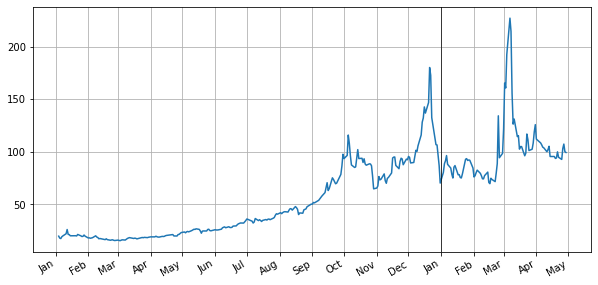

In [2]:
gas = pd.read_csv('data/Dutch TTF Natural Gas Futures Recent.csv', index_col=0)['Price']
gas.index = pd.to_datetime(gas.index)
fig = plt.figure(figsize=(10, 5))
ax = gas.plot()

X = plt.gca().xaxis
X.set_major_locator(mdates.MonthLocator())
X.set_major_formatter(mdates.DateFormatter('%b'))
plt.axvline('2022-01', color='black', linewidth=0.7)
plt.grid()
plt.xlabel('')
gas.sort_index().to_csv('data/gas_prices_TTF.csv')

In [3]:
electricity = pd.read_csv('data/Gro_handelspreise_202101010000_202203302359.csv', sep=';', decimal=',')
electricity = electricity.groupby('Datum')['Deutschland/Luxemburg[€/MWh]'].mean()
electricity.index = pd.to_datetime(electricity.index, format='%d.%m.%Y')
electricity = electricity.sort_index()

In [4]:
both = pd.concat([gas, electricity], keys=['gas', 'electricity'], axis=1)
both.columns = ['Natural Gas TTF', 'Electricity Day-Ahead DE']
both.to_csv('data/gas_and_electricity_prices.csv')

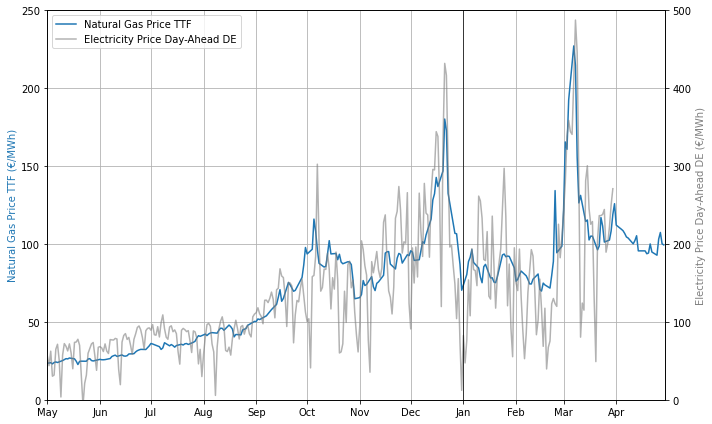

In [5]:
lang = 'EN'
fig = plt.figure(figsize=(10, 6))

ax1 = fig.add_subplot(111)
plt.grid()

ax2 = ax1.twinx()
handle2, = ax2.plot(electricity.index, electricity, color='tab:grey', label='test',alpha=0.6)
label2 = {'DE': 'Strompreis Day-Ahead DE', 'EN': 'Electricity Price Day-Ahead DE'}[lang]
ax2.set_ylabel(label2 + ' (€/MWh)', color='tab:grey')
ax2.set_ylim(0,500)

handle1, = ax1.plot(gas.index, gas)
label1 = {'DE': 'Erdgaspreis TTF ', 'EN': 'Natural Gas Price TTF'}[lang]
ax1.set_ylabel(label1 + ' (€/MWh)', color='tab:blue')
ax1.set_ylim(0, 250)

plt.axvline(pd.Timestamp(2022,1,1), color='black', linewidth=0.7)
plt.xlim(pd.Timestamp(2021,5,1),pd.Timestamp(2022,4,30))
X = plt.gca().xaxis
X.set_major_locator(mdates.MonthLocator())
X.set_major_formatter(mdates.DateFormatter('%b'))

ax1.legend([handle1, handle2], [label1, label2])

plt.tight_layout()
plt.savefig(f'{lang}.png', dpi=300)

In [6]:
households = pd.read_csv('data/Erdgas_Preisentwicklung_BDEW.csv', index_col=0)['Gas price']

households.index = pd.to_datetime(households.index)
#householdsm = households.resample('1m', label='left').mean()
#householdsm.index = householdsm.index + pd.Timedelta('1d')

households.index

DatetimeIndex(['2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01',
               '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01',
               '2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01',
               '2022-05-01', '2022-06-01'],
              dtype='datetime64[ns]', name='Month', freq=None)

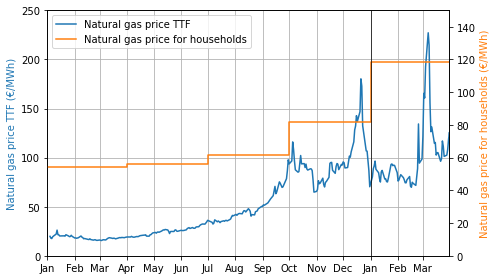

In [13]:
lang = 'EN'
fig = plt.figure(figsize=(7, 4))

ax1 = fig.add_subplot(111)
plt.grid()

ax3 = ax1.twinx()
handle3, = ax3.step(households.index, households, color='tab:orange', where='post')
label3 = {'DE': 'Erdgaspreis für Haushalte', 'EN': 'Natural gas price for households'}[lang]
ax3.set_ylabel(label3 + ' (€/MWh)', color='tab:orange')
ax3.set_ylim(0, 150)

handle1, = ax1.plot(gas.index, gas)
label1 = {'DE': 'Erdgaspreis TTF ', 'EN': 'Natural gas price TTF'}[lang]
ax1.set_ylabel(label1 + ' (€/MWh)', color='tab:blue')
ax1.set_ylim(0, 250)

plt.axvline(pd.Timestamp(2022,1,1), color='black', linewidth=0.7)
plt.xlim(pd.Timestamp(2021,1,1),pd.Timestamp(2022,3,31))
X = plt.gca().xaxis
X.set_major_locator(mdates.MonthLocator())
X.set_major_formatter(mdates.DateFormatter('%b'))

ax1.legend([handle1, handle3], [label1, label3])

plt.tight_layout()
plt.savefig('prices_TTF_households.png', dpi=300)